Descriptive Statistics and Statistical Graphics
===

In [2]:
#Load the Iris data set
import numpy as np
import pandas as pd
import sklearn.datasets
import matplotlib.pyplot as plt
import matplotlib
from pandas.tools.plotting import scatter_matrix

%matplotlib inline 

#Get the data set
iris = sklearn.datasets.load_iris()
X    = iris['data']
Y    = iris['target']
feature_names = iris['feature_names']
target_names = iris['target_names']


#Create pandas data frame
XY = np.hstack((X,target_names[Y][:,np.newaxis]))
df = pd.DataFrame(XY)
df.columns= feature_names + ["Class"]
df[feature_names] = df[feature_names].astype(float)


Data Tables
---

In [3]:
XY[:10]

array([['5.1', '3.5', '1.4', '0.2', 'setosa'],
       ['4.9', '3.0', '1.4', '0.2', 'setosa'],
       ['4.7', '3.2', '1.3', '0.2', 'setosa'],
       ['4.6', '3.1', '1.5', '0.2', 'setosa'],
       ['5.0', '3.6', '1.4', '0.2', 'setosa'],
       ['5.4', '3.9', '1.7', '0.4', 'setosa'],
       ['4.6', '3.4', '1.4', '0.3', 'setosa'],
       ['5.0', '3.4', '1.5', '0.2', 'setosa'],
       ['4.4', '2.9', '1.4', '0.2', 'setosa'],
       ['4.9', '3.1', '1.5', '0.1', 'setosa']], 
      dtype='|S32')

In [4]:
#Display the data frame as a table
df[:10]

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Class
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
5,5.4,3.9,1.7,0.4,setosa
6,4.6,3.4,1.4,0.3,setosa
7,5.0,3.4,1.5,0.2,setosa
8,4.4,2.9,1.4,0.2,setosa
9,4.9,3.1,1.5,0.1,setosa


In [5]:
df.shape

(150, 5)

In [6]:
df.head(5) #Just the first five rows

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Class
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [7]:
df.tail(5) #Just the last five rows


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Class
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica
149,5.9,3.0,5.1,1.8,virginica


In [8]:
df[["sepal length (cm)","sepal width (cm)"]].head(5) #Just the first two columns

,sepal length (cm),sepal width (cm)
0,5.1,3.5
1,4.9,3.0
2,4.7,3.2
3,4.6,3.1
4,5.0,3.6


Descriptive Statistics for Single Variables
---

In [9]:
df.mean()

sepal length (cm)    5.843333
sepal width (cm)     3.054000
petal length (cm)    3.758667
petal width (cm)     1.198667
dtype: float64

In [10]:
df.median()

sepal length (cm)    5.80
sepal width (cm)     3.00
petal length (cm)    4.35
petal width (cm)     1.30
dtype: float64

In [11]:
df.std()

sepal length (cm)    0.828066
sepal width (cm)     0.433594
petal length (cm)    1.764420
petal width (cm)     0.763161
dtype: float64

In [12]:
summary = pd.DataFrame(pd.concat([df.mean(),df.median(),df.std()],axis=1))
summary.columns=["Mean","Median","Std"]
summary

,Mean,Median,Std
sepal length (cm),5.843333,5.80,0.828066
sepal width (cm),3.054000,3.00,0.433594
petal length (cm),3.758667,4.35,1.764420
petal width (cm),1.198667,1.30,0.763161


Basic Plots for Single Variables
---

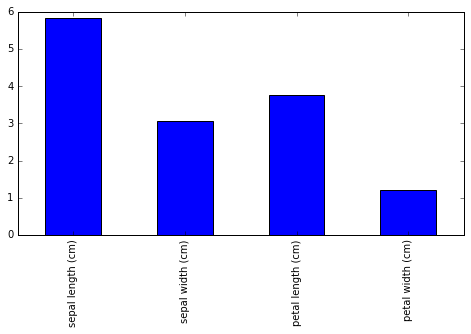

In [13]:
df.mean().plot(kind="bar",figsize=(8,4)); 
#Bar chart of variable means

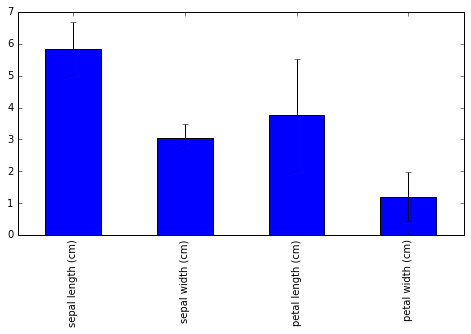

In [14]:
axis=df.mean().plot(kind="bar",yerr=df.std(), figsize=(8,4)); 
#Add error bars to reflect distribution around the mean

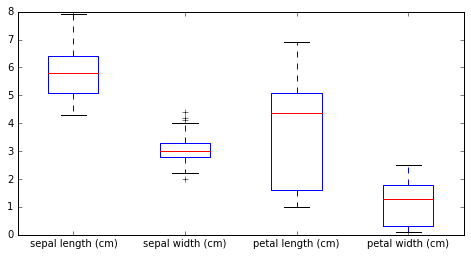

In [15]:
axis=df.plot(kind="box",figsize=(8,4)); 
#A box plot showing non-parametric statistic 
#(median, 25th, and 75th percentiles) for each variable

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f939da07750>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x7f9398b69710>]], dtype=object)

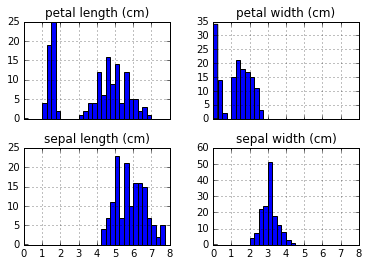

In [16]:
df.hist(bins=np.arange(0,8,0.25),sharex=True);
#Histrogram showing full distribution for each variables

Descriptive Statistics for Relationship Between Variables
---

In [18]:
df.cov()
#The sample covarance matrix between all pairs of variables

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
sepal length (cm),0.685694,-0.039268,1.273682,0.516904
sepal width (cm),-0.039268,0.188004,-0.321713,-0.117981
petal length (cm),1.273682,-0.321713,3.113179,1.296387
petal width (cm),0.516904,-0.117981,1.296387,0.582414


In [19]:
df.corr()
#The sample correlation matrix between all pairs of variables

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
sepal length (cm),1.000000,-0.109369,0.871754,0.817954
sepal width (cm),-0.109369,1.000000,-0.420516,-0.356544
petal length (cm),0.871754,-0.420516,1.000000,0.962757
petal width (cm),0.817954,-0.356544,0.962757,1.000000


Visualizing Relationships Between Variables
---

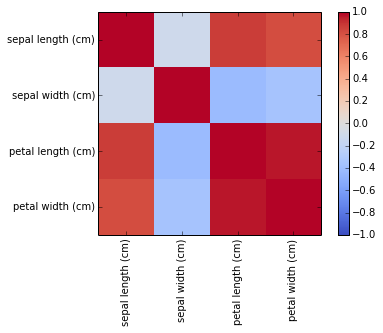

In [18]:
#Plotting the correlation matrix as a heat map
plt.imshow(df.corr(),interpolation="nearest",cmap=plt.get_cmap('coolwarm'));
plt.colorbar();
plt.xticks(np.arange(0, len(df.columns)-1, 1), df.columns,rotation=90)
plt.yticks(np.arange(0, len(df.columns)-1, 1), df.columns)
plt.clim(-1,1)

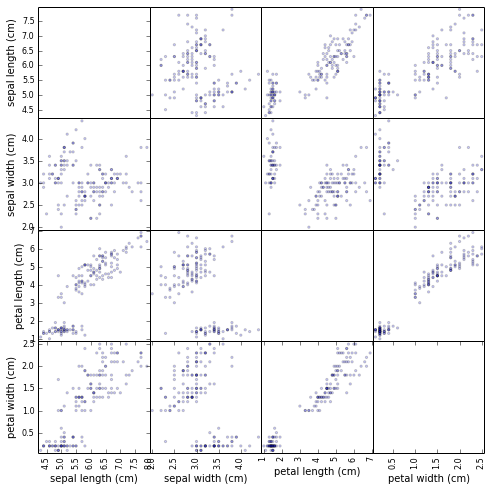

In [19]:
#Pair-wise scatter plots for all pairs of variables
scatter_matrix(df, alpha=0.2, figsize=(8, 8), diagonal='none');

Visualizing Class Dependence
--

In [20]:
df.groupby("Class").mean()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
Class,,,,
setosa,5.006,3.418,1.464,0.244
versicolor,5.936,2.770,4.260,1.326
virginica,6.588,2.974,5.552,2.026


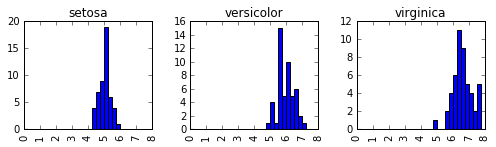

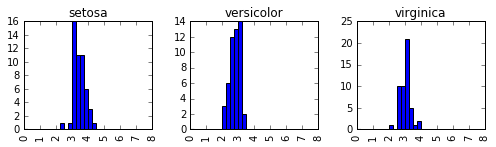

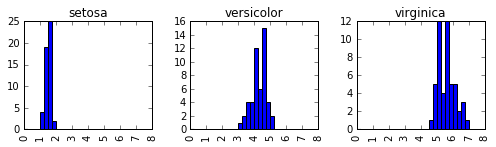

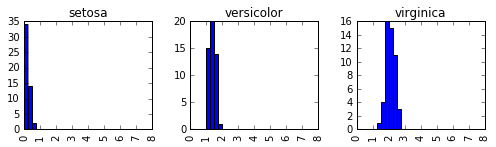

In [21]:
#Plot histograms of values for each varible with data grouped by class
for f in feature_names:
  df[[f,"Class"]].hist(by="Class",figsize=(8,2),sharex=True,bins=np.arange(0,8,0.25),layout=(1, 3));

In [22]:
#Per-class correlation matrices 
df.groupby("Class").corr()

petal length (cm)  petal width (cm)  \
Class                                                               
setosa     petal length (cm)           1.000000          0.306308   
           petal width (cm)            0.306308          1.000000   
           sepal length (cm)           0.263874          0.279092   
           sepal width (cm)            0.176695          0.279973   
versicolor petal length (cm)           1.000000          0.786668   
           petal width (cm)            0.786668          1.000000   
           sepal length (cm)           0.754049          0.546461   
           sepal width (cm)            0.560522          0.663999   
virginica  petal length (cm)           1.000000          0.322108   
           petal width (cm)            0.322108          1.000000   
           sepal length (cm)           0.864225          0.281108   
           sepal width (cm)            0.401045          0.537728   

                              sepal length (cm)  sepal width (cm)  
Class                                                              
setosa     petal length (cm)           0.263874          0.176695  
           petal width (cm)            0.279092          0.279973  
           sepal length (cm)           1.000000          0.746780  
           sepal width (cm)            0.746780          1.000000  
versicolor petal length (cm)           0.754049          0.560522  
           petal width (cm)            0.546461          0.663999  
           sepal length (cm)           1.000000          0.525911  
           sepal width (cm)            0.525911          1.000000  
virginica  petal length (cm)           0.864225          0.401045  
           petal width (cm)            0.281108          0.537728  
           sepal length (cm)           1.000000          0.457228  
           sepal width (cm)            0.457228          1.000000

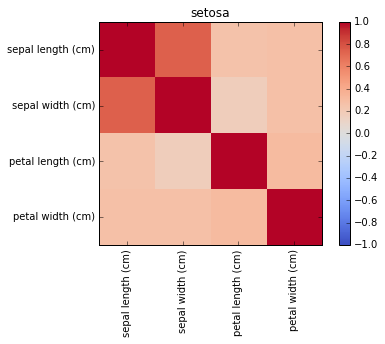

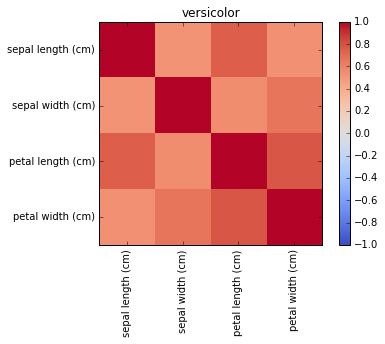

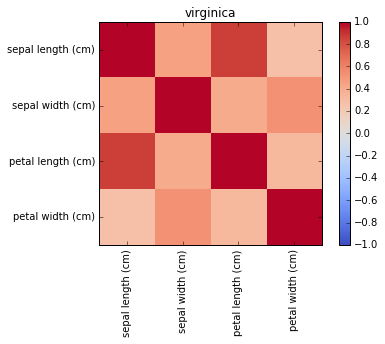

In [22]:
#Heat maps of per-class correlation matrices
for c in target_names:
    plt.figure()
    plt.imshow(df[df["Class"]==c].corr(),interpolation="nearest",cmap=plt.get_cmap('coolwarm'));
    plt.colorbar();
    plt.xticks(np.arange(0, len(df.columns)-1, 1), df.columns,rotation=90)
    plt.yticks(np.arange(0, len(df.columns)-1, 1), df.columns)
    plt.clim(-1,1)
    plt.title(c)

Visualizing Multiple Attributes with Bubble Plots
--

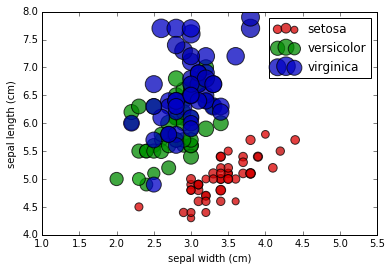

In [91]:
colors=np.array([[1,0,0],[0,1,0],[0,0,1]])
["r","g","b"]
i=0

for c in target_names:
  thisc=np.outer(sigma((thisdf['petal width (cm)'])/2.5),1*colors[i])  
  thisdf = df[df["Class"]==c]
  if i==0: 
    ax=thisdf.plot(kind='scatter', x='sepal width (cm)', y='sepal length (cm)', s=thisdf['petal length (cm)']*50, c=thisc, alpha=0.75)
  else:
    thisdf.plot(kind='scatter', x='sepal width (cm)', y='sepal length (cm)', s=thisdf['petal length (cm)']*50, c=thisc, alpha=0.75,ax=ax)    
  plt.xlim(1,5.5)
  plt.ylim(4,8)  
  plt.hold(True)
  i=i+1
ax.legend(target_names)    